### **DATA ANALYSIS PROJECT - BLINKIT EXPLORATORY DATA ANALYSIS**

#### **IMPORT LIBRARIES**

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **IMPORT RAW DATA**

In [92]:
dataframe = pd.read_csv('/Users/mcr_animesh/Documents/DATA ANALYTICS/PYTHON/PROJECTS/BLINKIT EDA/CSV_DATA /blinkit_data.csv')

#### **SAMPLE DATA**

In [93]:
dataframe.head(10)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


#### **SIZE OF THE DATA**

In [94]:
print("SIZE OF THE DATA : ",dataframe.shape)

SIZE OF THE DATA :  (8523, 12)


#### **COLUMNS IN THE DATA**

In [95]:
dataframe.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

#### **DATA TYPE OF THE COLUMNS**

In [96]:
dataframe.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

#### **DATA CLEANING**

In [97]:
print(dataframe["Item Fat Content"].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [98]:
dataframe["Item Fat Content"] = dataframe["Item Fat Content"].replace({"low fat" : "Low Fat",
                                                                        "LF" : "Low Fat" , 
                                                                        "reg" : "Regular"})

In [99]:
print(dataframe["Item Fat Content"].unique())

['Regular' 'Low Fat']


#### **BUSINESS REQUIREMENTS**

#### **KPI'S REQUIREMENTS**

In [100]:
# TOAL SALES 
total_sales = dataframe['Sales'].sum()

# AVERAGE SALES 
avg_sales = dataframe['Sales'].mean()

# NUMBER OF ITEMS SOLD 
no_of_items_sold = dataframe['Sales'].count()

# AVERAGE RATING FOR THE PRODUCT 
avg_rating = dataframe['Rating'].mean()

# DISPLAY 
print("TOATAL SALES = $.",round(total_sales,2))
print("AVERAGE SALES = $.",round(avg_sales,2))
print("NUMBER OF ITEMS SOLD = ",no_of_items_sold)
print("AVERAGE RATING FOR THE PRODUCT = ",round(avg_rating,2))


TOATAL SALES = $. 1201681.48
AVERAGE SALES = $. 140.99
NUMBER OF ITEMS SOLD =  8523
AVERAGE RATING FOR THE PRODUCT =  3.97


#### **CHARTS REQUIREMENTS**

##### **TOTAL SALES BY FAT CONTENT**

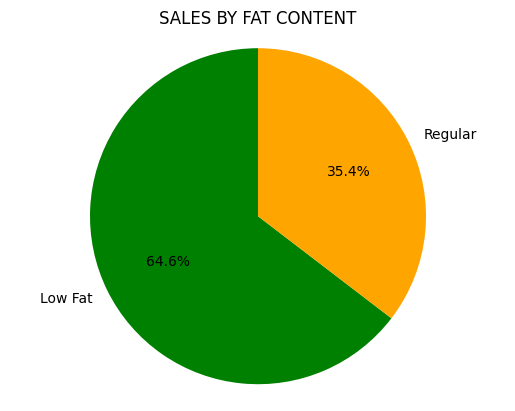

In [101]:
sales_by_fat = dataframe.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat , labels = sales_by_fat.index ,
                        autopct = '%.1f%%',
                        startangle = 90,
                        colors = ['green','orange'])

plt.title("SALES BY FAT CONTENT")
plt.axis('equal')
plt.show()

##### **TOTAL SALES BY ITEM TYPE**

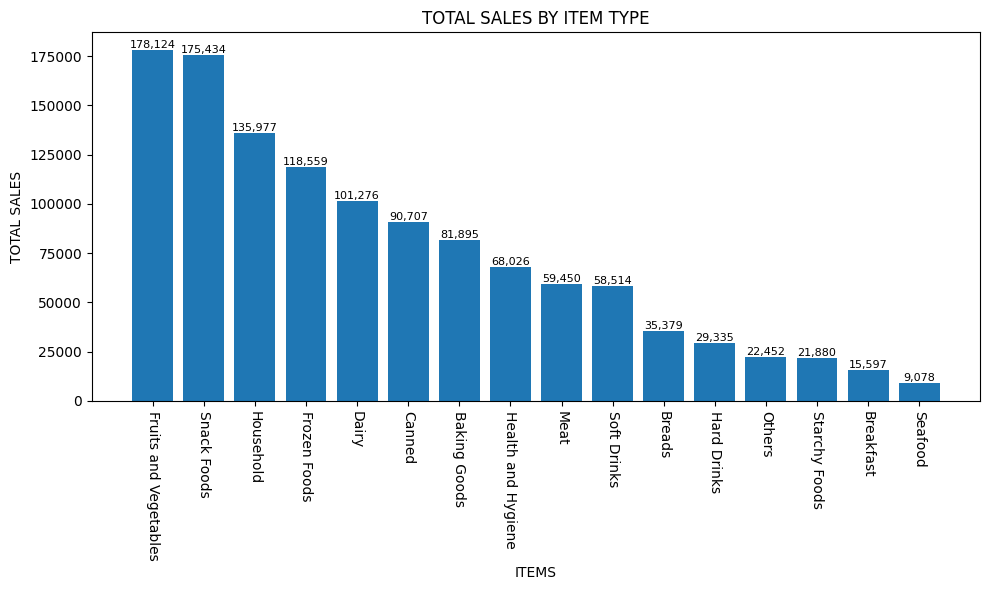

In [102]:
sales_by_item_type = dataframe.groupby('Item Type')['Sales'].sum().sort_values(ascending = False)

plt.figure(figsize = (10,6))
bars = plt.bar(sales_by_item_type.index , sales_by_item_type.values)
plt.xticks(rotation = -90)
plt.xlabel("ITEMS")
plt.ylabel("TOTAL SALES")
plt.title("TOTAL SALES BY ITEM TYPE")


for bar in bars :
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
    f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()

plt.show()


##### **FAT CONTENT BY OUTLET FOR TOTAL SALES**

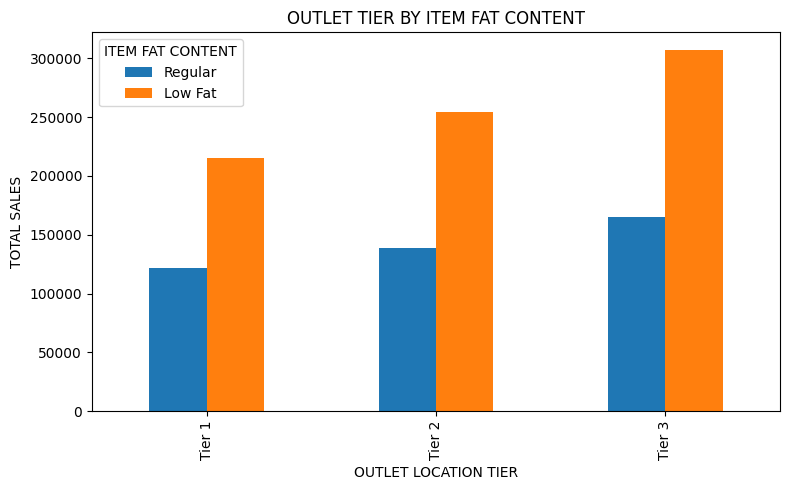

In [103]:
grouped = dataframe.groupby(['Outlet Location Type', 'Item Fat Content'])["Sales"].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax = grouped.plot(kind = "bar" , figsize = (8,5) , title = "OUTLET TIER BY ITEM FAT CONTENT")
plt.xlabel("OUTLET LOCATION TIER")
plt.ylabel('TOTAL SALES')
plt.legend(title = "ITEM FAT CONTENT")
plt.tight_layout()
plt.show()

##### **TOTAL SALES OUTLET ESTABLISHMENT**

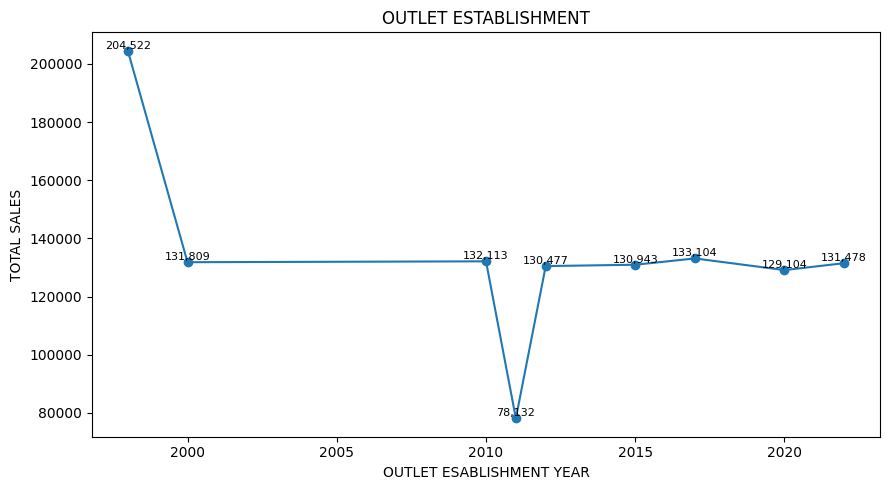

In [104]:
sales_by_year = dataframe. groupby('Outlet Establishment Year') ['Sales']. sum() .sort_index()

plt. figure(figsize=(9,5))
plt. plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('OUTLET ESABLISHMENT YEAR')
plt.ylabel("TOTAL SALES")
plt.title("OUTLET ESTABLISHMENT")

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


##### **SALES BY OUTLET SIZE**

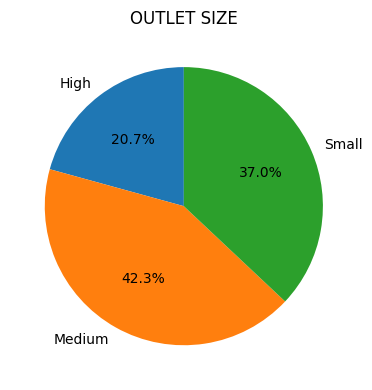

In [105]:
sales_by_size = dataframe.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(4, 4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title("OUTLET SIZE")
plt.tight_layout()
plt.show()

##### **SALES BY OUTLET LOCATION**

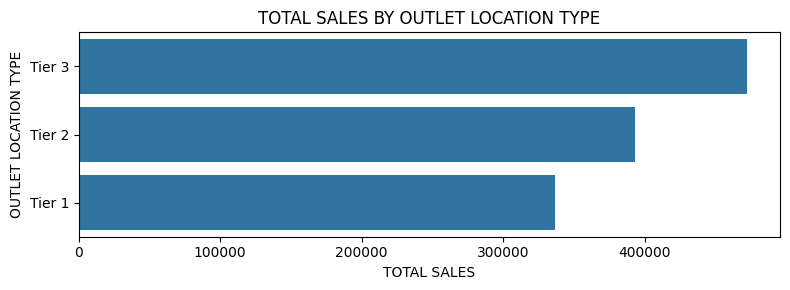

In [106]:
sales_by_location = dataframe.groupby('Outlet Location Type') ['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values( 'Sales', ascending=False)

plt. figure(figsize=(8, 3)) # SMALLER HEIGHT , ENOUGH WIDTH 

ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

plt. title('TOTAL SALES BY OUTLET LOCATION TYPE')
plt. xlabel( 'TOTAL SALES')
plt.ylabel( 'OUTLET LOCATION TYPE')
plt. tight_layout() # ENSURES LAYOUT FITS WITHOUT SCROLL 
plt. show()